In [373]:
# IMPORTAR LIBRERIAS
import pandas as pd
import kagglehub
import kaggle
import missingno as msno
import re

In [3]:
# DESCARGAR DATASET
kaggle.api.authenticate()
kaggle.api.dataset_download_files("shivamb/disney-movies-and-tv-shows", path = r"C:\Users\danie\MIAD\202511 - VISUALIZACION Y STORYTELLING", unzip=True)
kaggle.api.dataset_download_files("shivamb/amazon-prime-movies-and-tv-shows", path = r"C:\Users\danie\MIAD\202511 - VISUALIZACION Y STORYTELLING", unzip=True)
kaggle.api.dataset_download_files("shivamb/netflix-shows", path = r"C:\Users\danie\MIAD\202511 - VISUALIZACION Y STORYTELLING", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows
Dataset URL: https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows
Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows


In [5]:
df_disney = pd.read_csv("disney_plus_titles.csv")
df_amazon = pd.read_csv("amazon_prime_titles.csv")
df_netflix = pd.read_csv("netflix_titles.csv")

In [7]:
df_disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [9]:
df_amazon.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [11]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


A priori, revisando los 3 datasets, encontramos que los show_id para cada una de las peliculas se repite en cada dataset, aunque esto no implique que sea el mismo show. Por lo cual al momento de unir los datasets se deberá crear un id único para cada tv-show, de tal forma que no afecte el análisis posterior 

In [13]:
df_disney['Streaming'] = "Disney"
df_amazon['Streaming'] = "Amazon"
df_netflix['Streaming'] = "Netflix"

In [272]:
df_streaming = pd.concat([df_amazon,df_disney,df_netflix], ignore_index=True)

In [259]:
df_streaming = pd.concat([df_disney,df_netflix], ignore_index=True)

In [261]:
df_streaming.rename(columns={'show_id':'sub_show_id'}, inplace=True)

In [263]:
df_streaming['show_id']=range(1, len(df_streaming)+1)

In [179]:
df_streaming.head()

,sub_show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Streaming,show_id
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney,1
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney,2
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney,3
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney,4
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney,5


In [23]:
df_streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10257 entries, 0 to 10256
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sub_show_id   10257 non-null  object
 1   type          10257 non-null  object
 2   title         10257 non-null  object
 3   director      7150 non-null   object
 4   cast          9242 non-null   object
 5   country       9207 non-null   object
 6   date_added    10244 non-null  object
 7   release_year  10257 non-null  int64 
 8   rating        10250 non-null  object
 9   duration      10254 non-null  object
 10  listed_in     10257 non-null  object
 11  description   10257 non-null  object
 12  Streaming     10257 non-null  object
 13  show_id       10257 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 1.1+ MB


<Axes: >

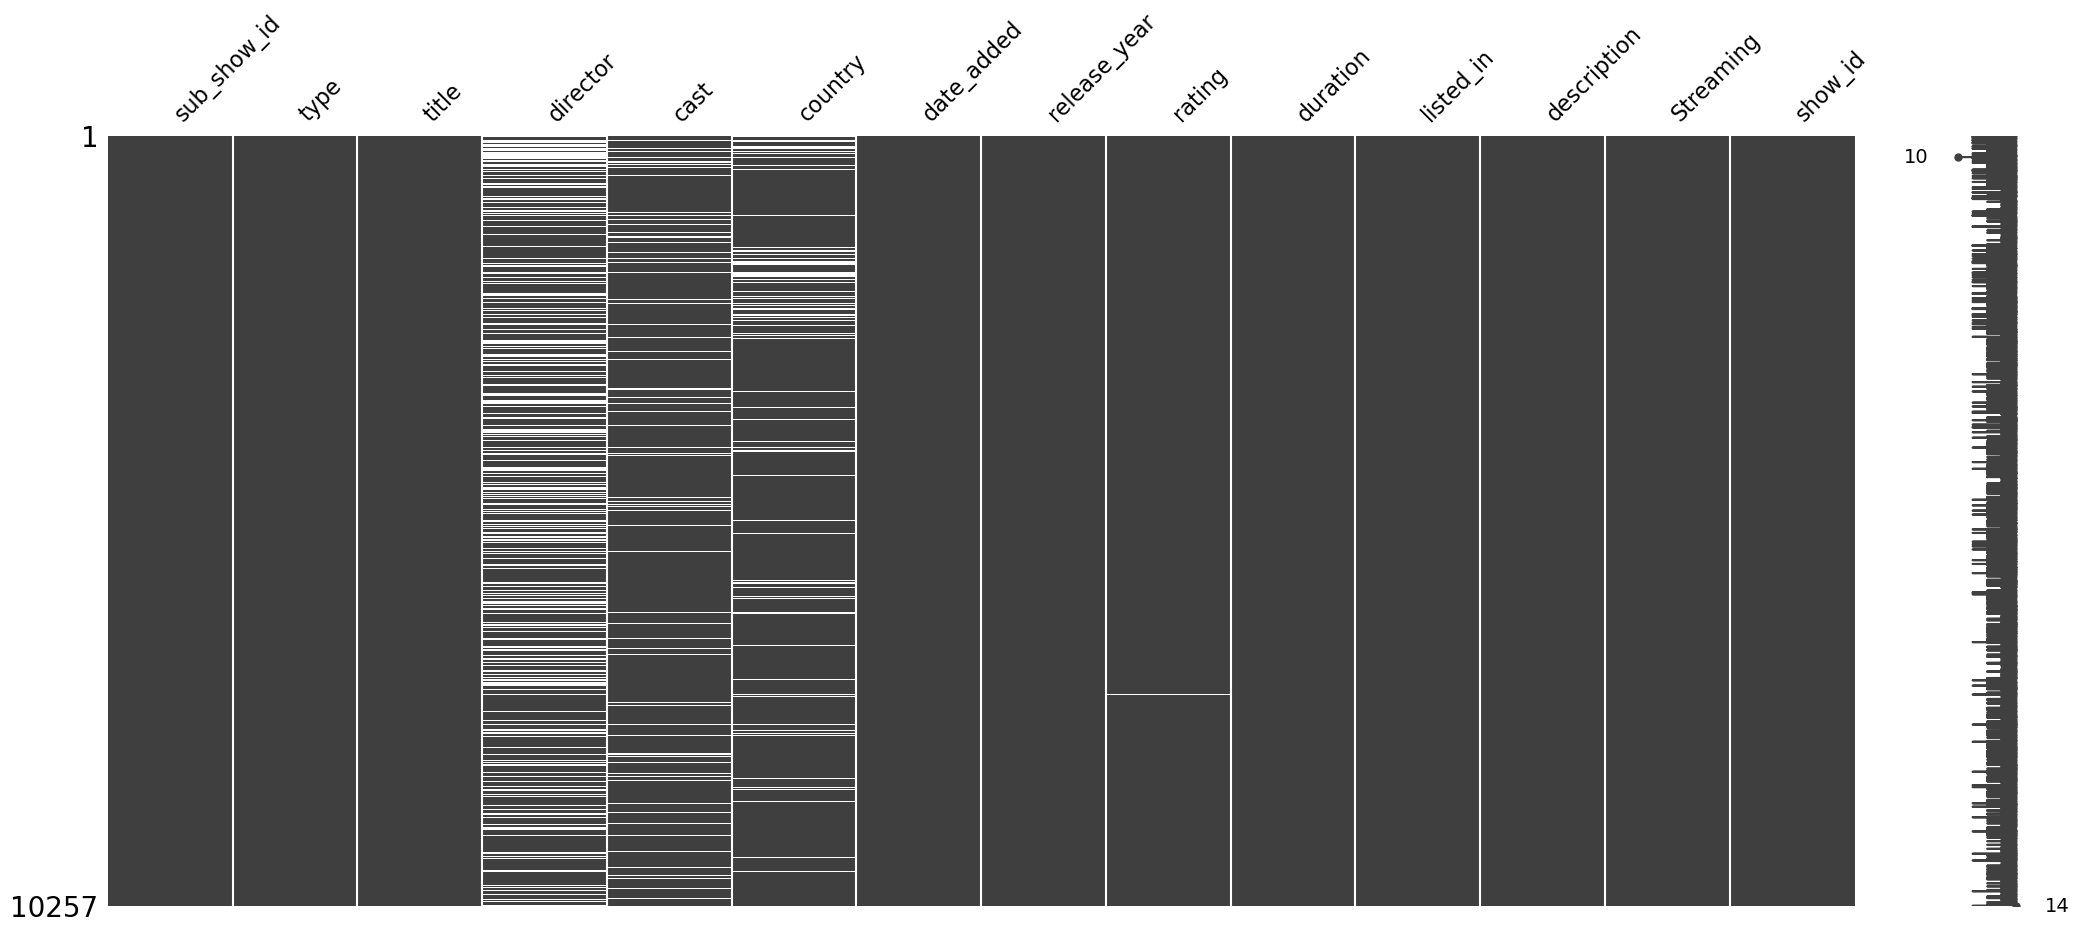

In [25]:
msno.matrix(df_streaming)

In [27]:
df_streaming.isna().sum().sort_values(ascending=False)/df_streaming.shape[0]

director        0.302915
country         0.102369
cast            0.098957
date_added      0.001267
rating          0.000682
duration        0.000292
sub_show_id     0.000000
type            0.000000
title           0.000000
release_year    0.000000
listed_in       0.000000
description     0.000000
Streaming       0.000000
show_id         0.000000
dtype: float64

In [29]:
for i in df_streaming.columns:
    print(f'{i} : {df_streaming[i].unique()} \n --------------------------------- \n')

sub_show_id : ['s1' 's2' 's3' ... 's8805' 's8806' 's8807'] 
 --------------------------------- 

type : ['Movie' 'TV Show'] 
 --------------------------------- 

title : ['Duck the Halls: A Mickey Mouse Christmas Special'
 'Ernest Saves Christmas' 'Ice Age: A Mammoth Christmas' ... 'Zombieland'
 'Zoom' 'Zubaan'] 
 --------------------------------- 

director : ['Alonso Ramirez Ramos, Dave Wasson' 'John Cherry' 'Karen Disher' ...
 'Chandra Prakash Dwivedi' 'Majid Al Ansari' 'Mozez Singh'] 
 --------------------------------- 

cast : ['Chris Diamantopoulos, Tony Anselmo, Tress MacNeille, Bill Farmer, Russi Taylor, Corey Burton'
 'Jim Varney, Noelle Parker, Douglas Seale'
 'Raymond Albert Romano, John Leguizamo, Denis Leary, Queen Latifah' ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sarah-

In [265]:
df_streaming  = df_streaming.drop(columns=['director'])

In [267]:
df_streaming = df_streaming.dropna(subset=['country'])

<Axes: >

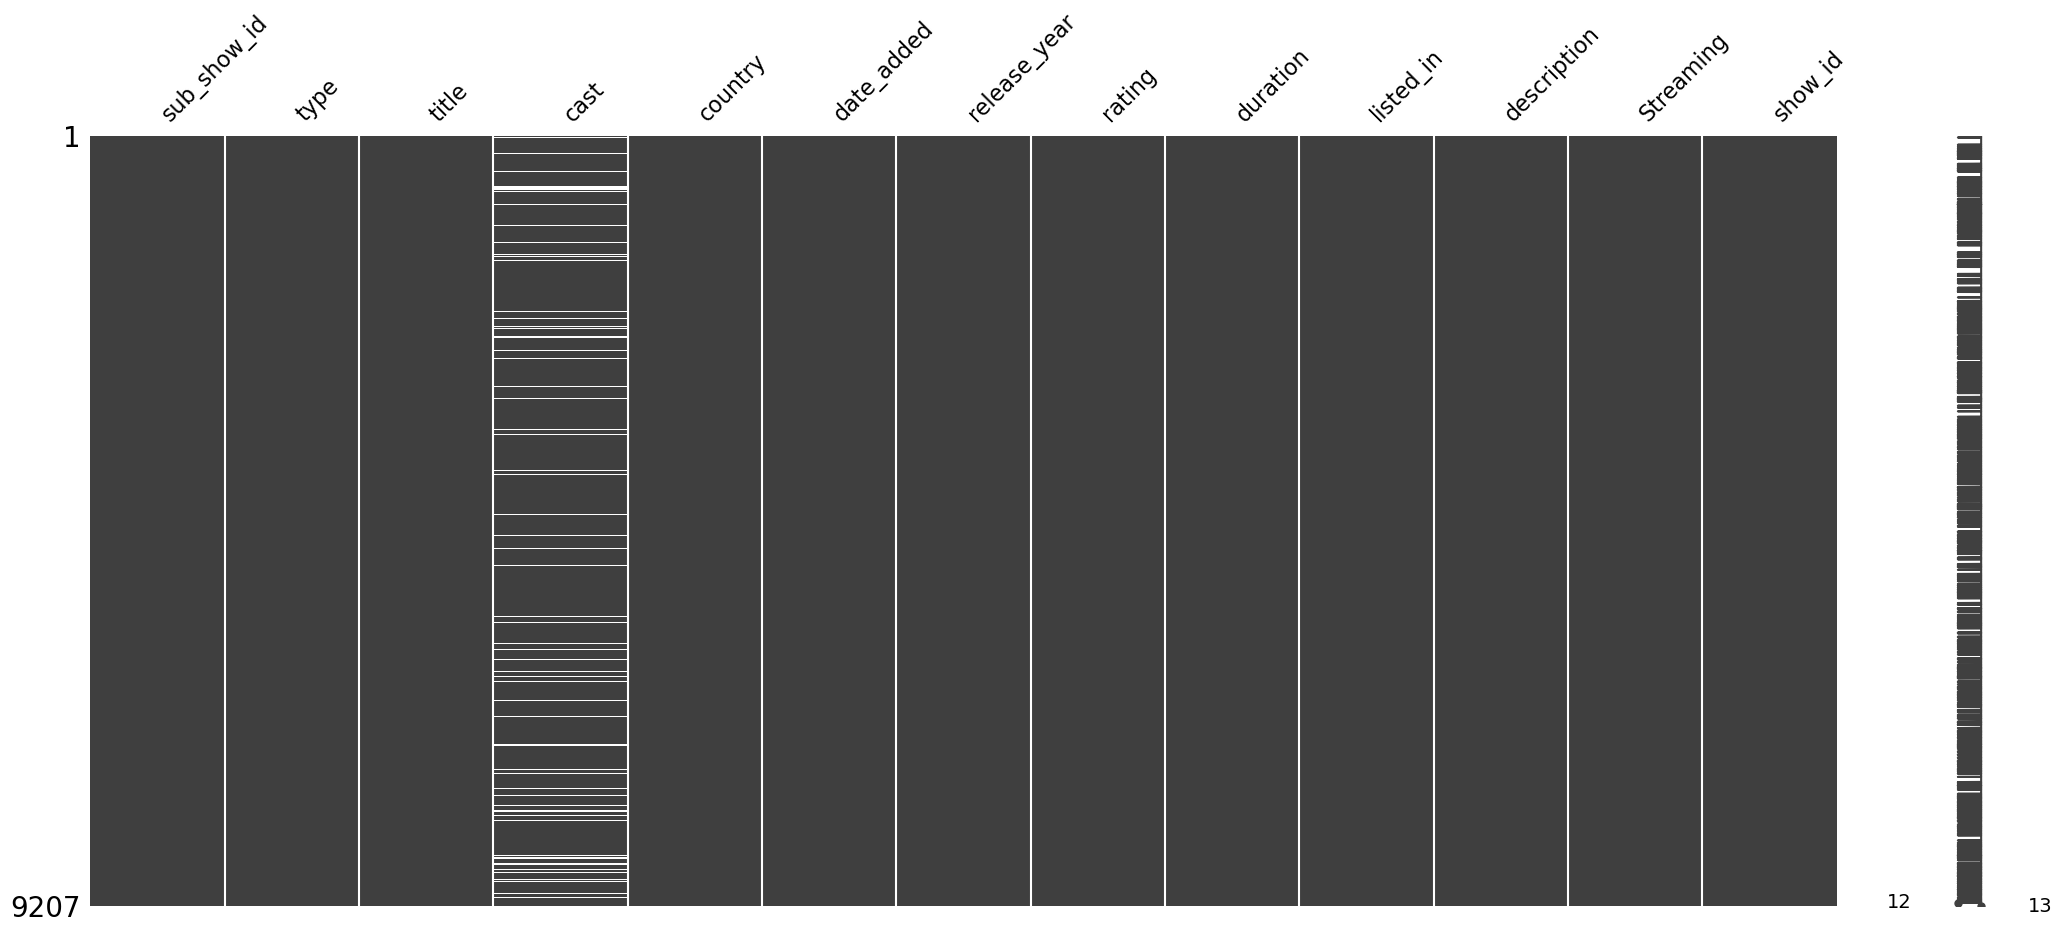

In [35]:
msno.matrix(df_streaming)

In [37]:
for i in df_streaming.columns:
    print(f'{i} : {df_streaming[i].unique()} \n --------------------------------- \n')

sub_show_id : ['s3' 's6' 's8' ... 's8805' 's8806' 's8807'] 
 --------------------------------- 

type : ['Movie' 'TV Show'] 
 --------------------------------- 

title : ['Ice Age: A Mammoth Christmas' 'Becoming Cousteau'
 'Port Protection Alaska' ... 'Zombieland' 'Zoom' 'Zubaan'] 
 --------------------------------- 

cast : ['Raymond Albert Romano, John Leguizamo, Denis Leary, Queen Latifah'
 'Jacques Yves Cousteau, Vincent Cassel'
 'Gary Muehlberger, Mary Miller, Curly Leach, Sam Carlson, Stuart Andrews, David Squibb'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'] 
 --------------------------------- 

country : ['United States' 'United States, Canada' 'United States, 

In [269]:
df_streaming['date_added'] =pd.to_datetime(df_streaming['date_added'].str.strip(), format='mixed')  

In [271]:
df_streaming.loc[df_streaming['rating'] == '66 min']

,sub_show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Streaming,show_id
7263,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,Netflix,7264


In [273]:
df_streaming.loc[df_streaming['rating'] == '74 min']

,sub_show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Streaming,show_id
6991,s5542,Movie,Louis C.K. 2017,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",Netflix,6992


In [275]:
df_streaming.loc[df_streaming['rating'] == '84 min']

,sub_show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Streaming,show_id
7244,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,Netflix,7245


In [277]:
df_streaming['duration'].loc[df_streaming['rating'] == '66 min'] = df_streaming['rating'].loc[df_streaming['rating'] == '66 min']
df_streaming['rating'].loc[df_streaming['rating'] == '66 min'] = 'TV-MA'

C:\Users\danie\AppData\Local\Temp\ipykernel_39980\2557115724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_streaming['duration'].loc[df_streaming['rating'] == '66 min'] = df_streaming['rating'].loc[df_streaming['rating'] == '66 min']
C:\Users\danie\AppData\Local\Temp\ipykernel_39980\2557115724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_streaming['rating'].loc[df_streaming['rating'] == '66 min'] = 'TV-MA'


In [287]:
df_streaming['duration'].loc[df_streaming['rating'] == '74 min'] = df_streaming['rating'].loc[df_streaming['rating'] == '74 min']
df_streaming['rating'].loc[df_streaming['rating'] == '74 min'] = 'TV-MA'

C:\Users\danie\AppData\Local\Temp\ipykernel_39980\3499539389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_streaming['duration'].loc[df_streaming['rating'] == '74 min'] = df_streaming['rating'].loc[df_streaming['rating'] == '74 min']
C:\Users\danie\AppData\Local\Temp\ipykernel_39980\3499539389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_streaming['rating'].loc[df_streaming['rating'] == '74 min'] = 'TV-MA'


In [289]:
df_streaming['duration'].loc[df_streaming['rating'] == '84 min'] = df_streaming['rating'].loc[df_streaming['rating'] == '84 min']
df_streaming['rating'].loc[df_streaming['rating'] == '84 min'] = 'TV-MA'

C:\Users\danie\AppData\Local\Temp\ipykernel_39980\2574201972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_streaming['duration'].loc[df_streaming['rating'] == '84 min'] = df_streaming['rating'].loc[df_streaming['rating'] == '84 min']
C:\Users\danie\AppData\Local\Temp\ipykernel_39980\2574201972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_streaming['rating'].loc[df_streaming['rating'] == '84 min'] = 'TV-MA'


In [291]:
df_streaming.loc[df_streaming['sub_show_id'] == 's5795']

,sub_show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Streaming,show_id
7244,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,2016-09-16,2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,Netflix,7245


In [293]:
df_streaming.loc[df_streaming['sub_show_id'] == 's5542']

,sub_show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Streaming,show_id
6991,s5542,Movie,Louis C.K. 2017,Louis C.K.,United States,2017-04-04,2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",Netflix,6992


In [285]:
df_streaming.loc[df_streaming['sub_show_id'] == 's5814']

,sub_show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Streaming,show_id
7263,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,2016-08-15,2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...,Netflix,7264


In [295]:
rating_dict = {
    'TV-G': 'Apto para todas las edades',
    'PG-13': 'No recomendado para menores de 13 anios',
    'TV-14': 'No recomendado para menores de 14 anios',
    'TV-PG': 'Supervisión de padres recomendada',
    'G': 'Apto para todas las edades',
    'PG': 'Supervisión de padres recomendada',
    'TV-Y7': 'Apto para niños mayores de 7 anios',
    'TV-Y': 'Apto para niños pequeños',
    'TV-Y7-FV': 'Apto para niños mayores de 7 anios con violencia de fantasia',
    'TV-MA': 'Solo para adultos',
    'R': 'Restringido, menores de 17 anios requieren acompañamiento de un adulto',
    'NC-17': 'No apto para menores de 17 anios',
    'NR': 'No clasificado',
    'UR': 'No clasificado',
    '13+': 'Apto para mayores de 13 anios',
    '18+':'Apto para mayores de 18 anios',
    'ALL': 'Apto para todas las edades',
    '16+': 'Apto para mayores de 16 anios',
    '7+': 'Apto para niños mayores de 7 anios'
}
df_streaming['rating_description'] = df_streaming['rating'].map(rating_dict)
df_streaming['rating_description'] = df_streaming['rating_description'].fillna('No clasificado')

In [297]:
df_streaming['duration'].unique()

array(['23 min', '94 min', '2 Seasons', '45 min', '91 min', '10 Seasons',
       '3 Seasons', '110 min', '8 min', '11 min', '7 min', '95 min',
       '129 min', '134 min', '9 min', '6 min', '87 min', '90 min',
       '93 min', '101 min', '132 min', '1 Season', '131 min', '104 min',
       '5 Seasons', '135 min', '4 Seasons', '105 min', '92 min', '99 min',
       '32 Seasons', '127 min', '106 min', '16 Seasons', '140 min',
       '19 Seasons', '66 min', '115 min', '137 min', '14 min', '85 min',
       '88 min', '126 min', '82 min', '125 min', '44 min', '7 Seasons',
       '98 min', '102 min', '170 min', '97 min', '112 min', '79 min',
       '6 Seasons', '89 min', '148 min', '121 min', '96 min', '109 min',
       '107 min', '86 min', '8 Seasons', '12 min', '48 min', '111 min',
       '22 min', '43 min', '180 min', '182 min', '60 min', '50 min',
       '46 min', '116 min', '123 min', '113 min', '117 min', '83 min',
       '3 min', '103 min', '122 min', '72 min', '143 min', '84 min',
     

In [299]:
# Se asume que una temporada tiene una duración promedio de 10 horas
df_streaming['duration_num'] = df_streaming['duration'].str.extract('(\d+)').astype(float)
df_streaming['duration_type'] = df_streaming['duration'].apply(lambda x: 'minutos' if 'min' in x else 'seasons')
df_streaming['standard_duration'] = df_streaming.apply(lambda x: x['duration_num'] * 600 if x['duration_type'] == 'seasons' else x['duration_num'], axis=1)


In [107]:
df_streaming.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Streaming,rating_description,duration_num,duration_type,standard_duration
2,s3,Movie,Ice Age: A Mammoth Christmas,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney,Apto para todas las edades,23.0,minutos,23.0
5,s6,Movie,Becoming Cousteau,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,Disney,No recomendado para menores de 13 anios,94.0,minutos,94.0
7,s8,TV Show,Port Protection Alaska,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2021-11-24,2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...,Disney,No recomendado para menores de 14 anios,2.0,seasons,1200.0
8,s9,TV Show,Secrets of the Zoo: Tampa,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2021-11-24,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...,Disney,Supervisión de padres recomendada,2.0,seasons,1200.0
9,s10,Movie,A Muppets Christmas: Letters To Santa,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...,Disney,Apto para todas las edades,45.0,minutos,45.0


In [359]:
df_streaming['country'] = df_streaming['country'].astype(str) 
df_streaming['country'] = df_streaming['country'].str.replace('\n', ' ', regex=True).str.strip()

In [375]:
df_streaming['country'] = df_streaming['country'].astype(str)  # Asegurar que todo sea string
df_streaming['country'] = df_streaming['country'].apply(lambda x: re.sub(r'\s*,\s*', ', ', x.strip()))

In [377]:
df = df_streaming.assign(country=df_streaming['country'].str.split(', ')).explode('country')

In [315]:
df['listed_in'].unique()

array(['Animation', 'Comedy', 'Family', 'Biographical', 'Documentary',
       'Docuseries', 'Reality', 'Survival', 'Animals & Nature', 'Musical',
       'Action-Adventure', 'Kids', 'Fantasy', 'Drama', 'Superhero',
       'Crime', 'Music', 'Science Fiction', 'Sports', 'Spy/Espionage',
       'Historical', 'Buddy', 'Coming of Age', 'Game Show / Competition',
       'Romance', 'Romantic Comedy', 'Concert Film', 'Thriller', 'Parody',
       'Police/Cop', 'Anime', 'Western', 'Anthology', 'Lifestyle',
       'Mystery', 'Variety', 'Movies', 'Soap Opera / Melodrama', 'Dance',
       'Medical', 'Disaster', 'Series', 'Travel', 'Documentaries',
       'International TV Shows', 'TV Dramas', 'TV Mysteries',
       'Romantic TV Shows', 'TV Comedies', 'Dramas', 'Independent Movies',
       'International Movies', 'British TV Shows', 'Reality TV',
       'Comedies', 'Crime TV Shows', 'Spanish-Language TV Shows',
       'TV Action & Adventure', 'Romantic Movies', 'Horror Movies',
       'Sci-Fi & Fanta

In [379]:
df.loc[df_streaming['show_id'] == 6398]

,sub_show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Streaming,show_id,rating_description,duration_num,duration_type,standard_duration
6397,s4948,Movie,A Sort of Family,"Bárbara Lennie, Daniel Aráoz, Claudio Tolcachi...",Argentina,2018-04-01,2017,TV-14,96 min,"Dramas, International Movies, Thrillers",An Argentine doctor faces legal and ethical ch...,Netflix,6398,No recomendado para menores de 14 anios,96.0,minutos,96.0
6397,s4948,Movie,A Sort of Family,"Bárbara Lennie, Daniel Aráoz, Claudio Tolcachi...",Brazil,2018-04-01,2017,TV-14,96 min,"Dramas, International Movies, Thrillers",An Argentine doctor faces legal and ethical ch...,Netflix,6398,No recomendado para menores de 14 anios,96.0,minutos,96.0
6397,s4948,Movie,A Sort of Family,"Bárbara Lennie, Daniel Aráoz, Claudio Tolcachi...",France,2018-04-01,2017,TV-14,96 min,"Dramas, International Movies, Thrillers",An Argentine doctor faces legal and ethical ch...,Netflix,6398,No recomendado para menores de 14 anios,96.0,minutos,96.0
6397,s4948,Movie,A Sort of Family,"Bárbara Lennie, Daniel Aráoz, Claudio Tolcachi...",Poland,2018-04-01,2017,TV-14,96 min,"Dramas, International Movies, Thrillers",An Argentine doctor faces legal and ethical ch...,Netflix,6398,No recomendado para menores de 14 anios,96.0,minutos,96.0
6397,s4948,Movie,A Sort of Family,"Bárbara Lennie, Daniel Aráoz, Claudio Tolcachi...",Germany,2018-04-01,2017,TV-14,96 min,"Dramas, International Movies, Thrillers",An Argentine doctor faces legal and ethical ch...,Netflix,6398,No recomendado para menores de 14 anios,96.0,minutos,96.0
6397,s4948,Movie,A Sort of Family,"Bárbara Lennie, Daniel Aráoz, Claudio Tolcachi...",Denmark,2018-04-01,2017,TV-14,96 min,"Dramas, International Movies, Thrillers",An Argentine doctor faces legal and ethical ch...,Netflix,6398,No recomendado para menores de 14 anios,96.0,minutos,96.0


In [381]:
df_streaming['country'] = df_streaming['country'].astype(str) 
df_streaming['country'] = df_streaming['country'].apply(lambda x: re.sub(r'\s*,\s*', ', ', x.strip()))

In [383]:
df = df.assign(listed_in=df_streaming['listed_in'].str.split(', ')).explode('listed_in')

In [385]:
df.to_parquet('df_streaming.parquet', index=False)
df.to_csv('df_streaming.csv', index=False)